<a href="https://colab.research.google.com/github/Azadshokrollahi/Artificial-intelligence-for-data-science-/blob/main/Lab2.1-decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structure of Lab 2

- **1. Decision Tree**
  - **Part 1: ID3 (from scratch) — placeholders 1–13**
    - Use the **Baseball** train and test datasets (Canvas → Lab section).
    - **Notes**
      - Print the **information gain (IG)** for all features and compare them.
      - Build and **visualize the decision tree**.
      - **Compute predictions** on the test set.
    - **Also:** Fill out all **16 placeholders** in the code and **answer 3 questions**.
  - **Part 2: Decision Tree (scikit-learn) — Regression**
    - Use the **Energy** train and test datasets.
    - **Tasks**
      - **Visualize** the tree at **four different depths**.
      - **Compare** their final **errors**.
      - **State** which **depth performs best** for this dataset.

- **2. SVM**
  - Proceed through the code, **answering 6 questions** one by one in **separate cells**, each inserted **after its corresponding question**.
  - For **Questions 1–5**,  use the**created dataset** .
  - For **Question 6**, use the **ex2data2.txt** dataset
  
  ( All data available on GitHub).


# <font color='#TTE99D'>**Decision Trees 🌵**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn import tree  #Importing directly (Not from scratch)

## **🔸 Part 1: ID3 (from Scratch)**

### Data

In [2]:
data = pd.read_csv("Lab2-Data/baseball.csv")                #(1) read baseball train dataset with pandas
data

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
data.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Model

####  Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [4]:
labels = data['play']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9402859586706311

In [5]:
# TODO: Implement entropy(labels) -> float
def entropy(labels):
    """
    Compute entropy H(Y) for a Pandas Series of labels.
    HINT: use value_counts(normalize=True) and -sum(p*log2(p))
    """
    # TODO begin
    p = labels.value_counts() / len(labels)                           #(2)
    return -sum(p * np.log2(p))                                    #(3)
    # TODO end

# quick check
entropy(data['play'])

0.9402859586706311

####  Information Gain: now you have to calculate IG for all features

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [6]:
target = 'play'
entropy_parent = entropy(data[target])
entropy_parent

entropy_child = 0
feature = 'wind'
for value in data[feature].unique():
    subset = data[data[feature] == value]
    display(subset)
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
information_gain = entropy_parent - entropy_child

print(information_gain)

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes


,outlook,temperature,humidity,wind,play
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
13,Rain,Hot,High,Strong,No


0.04812703040826949


In [7]:
# TODO: Implement information_gain(data, feature, target) -> float

def information_gain(data, feature, target):
    """
    IG = H(parent) - sum_v (|Dv|/|D|)*H(Dv)
    """
    # TODO begin
    # Entropy of parent
    entropy_parent = entropy(data[target])                        #(4)

    # Entropy of child
    entropy_child = 0.0
    for value in data[feature].unique():
        subset = data[data[feature] == value]                        #(5)
        wi = len(subset) / len(data)                                 #(6)
        entropy_child += wi * entropy(subset[target])
    return entropy_parent - entropy_child
    # TODO end

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>: Now, you should calculate IG for all features and say which one is more important**

In [8]:
for feature in data:
    for feature_2 in data:
        if feature_2 == feature: continue
        print(f"Information gain for {feature} and {feature_2} is: {information_gain(data, feature, feature_2)}")



Information gain for outlook and temperature is: 0.06174335793280106
Information gain for outlook and humidity is: 0.02074957538952249
Information gain for outlook and wind is: 0.0059777114237740125
Information gain for outlook and play is: 0.24674981977443933
Information gain for temperature and outlook is: 0.06174335793280106
Information gain for temperature and humidity is: 0.3954004680921318
Information gain for temperature and wind is: 0.0059777114237740125
Information gain for temperature and play is: 0.10389267691729642
Information gain for humidity and outlook is: 0.0207495753895226
Information gain for humidity and temperature is: 0.3954004680921319
Information gain for humidity and wind is: 0.0
Information gain for humidity and play is: 0.15183550136234159
Information gain for wind and outlook is: 0.0059777114237740125
Information gain for wind and temperature is: 0.0059777114237740125
Information gain for wind and humidity is: 0.0
Information gain for wind and play is: 0.048

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'> Answer:

The most important information gain seems to be from temperature and humidity with an information gain of: 0.3954

####  Decision Tree & Node

Based on the following images, you need a Node class and a make_tree function. The Node class is already written, and you are expected to fill in the make_tree function

In [9]:
import os, base64
from IPython.display import HTML, display

def embed_image(path, width=200):
    assert os.path.exists(path), f"Not found: {path}"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("ascii")
    return f'<img src="data:image/png;base64,{b64}" width="{width}"/>'

def show_images(paths, width=200, gap=10):
    imgs = "".join(embed_image(p, width) for p in paths)
    html = f'<div style="display:flex; gap:{gap}px;">{imgs}</div>'
    display(HTML(html))

show_images(
    ["/content/decision-tree.png", "/content/node.png"],
    width=500,
    gap=15
)


AssertionError: Not found: /content/decision-tree.png

In [11]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

Node(feature='wind')
Node(label='yes')

LeafNode(label="yes")

<font color='#EE15D'>**Fill out make_tree function**

In [13]:
# TODO: Implement make_tree(data, target) -> Node
def make_tree(data, target):
    """
    Recursively build an ID3 tree.
    Base cases:
      - if all labels same -> leaf(label)
      - if no features left -> leaf(majority class)
    Otherwise:
      - choose feature with max IG
      - for each value of that feature, build subtree on the subset (drop that feature)
    """
    # TODO begin

    # BASE CASE 1: Check if all target labels are the same (pure node)
    # If data has only one unique class, create a leaf node with that class label
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])  # Return leaf with the single class label

    # Get all feature columns (everything except the target column)
    features = data.drop(target, axis=1).columns

    # BASE CASE 2: Check if there are no features left to split on, or if dataset is empty
    # If so, create a leaf node with the most common (mode) class in the data
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])  # Return leaf with majority class

    # RECURSIVE CASE: Calculate information gain for each remaining feature
    # This list comprehension computes IG for every feature to determine which splits the data best
    gains = [information_gain(data, feature, target) for feature in features]  #(7)

    # Find the feature with maximum information gain (greedy selection)
    # argmax returns the index of the maximum value in the gains list
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]  # Get the actual feature name  #(8)

    # Create an internal (decision) node using the best feature
    # This node will have children corresponding to each value of this feature
    node = Node(feature=best_feature)

    # Iterate over each unique value that the best feature can take
    for value in data[best_feature].unique():  #(9)
        # Create a subset of data where best_feature equals this specific value
        # Drop the best_feature column since we've already split on it (no longer needed)
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)  #(10)

        # Recursively build a subtree for this subset and attach it as a child
        # The key is the feature value, the value is the subtree (Node)
        node.children[value] = make_tree(subset, target)

    # Return the constructed decision node with all its children
    return node
    # TODO end

In [14]:
tree = make_tree(data, 'play')
tree

tree.feature

'outlook'

### Evaluation

In [15]:
data_test = pd.read_csv('Lab2-Data/baseball-test.csv')
data_test.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data_test

,outlook,temperature,humidity,wind,play
0,Overcast,Mild,High,Weak,Yes
1,Rain,Cool,Normal,Strong,No
2,Sunny,Hot,Normal,Weak,Yes


In [16]:
# TODO : Implement predict(node, sample_dict) -> label
def predict(node, sample):
    """
    Predict class for one sample (dict-like).
    If unseen branch happens, you may fallback to current node's label (or majority of subtree).
    """

    if node.feature is None:
        return node.label                                                        #(11)

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        # simple fallback: return current node's most frequent descendant label
        return node.label                                                           #(12)


[predict(tree, sample) for _, sample in data_test.iterrows()]                      #(13)

['Yes', 'No', 'Yes']

<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Visulize the tree

### Visualization

In [18]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

<font color='#GG15D'>**Question2:**</font> <font color='#EE15D'> Answer:
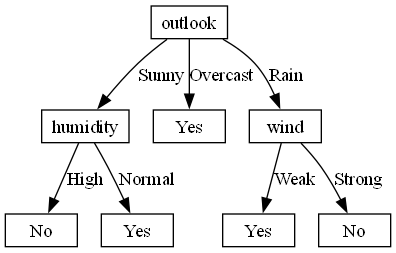
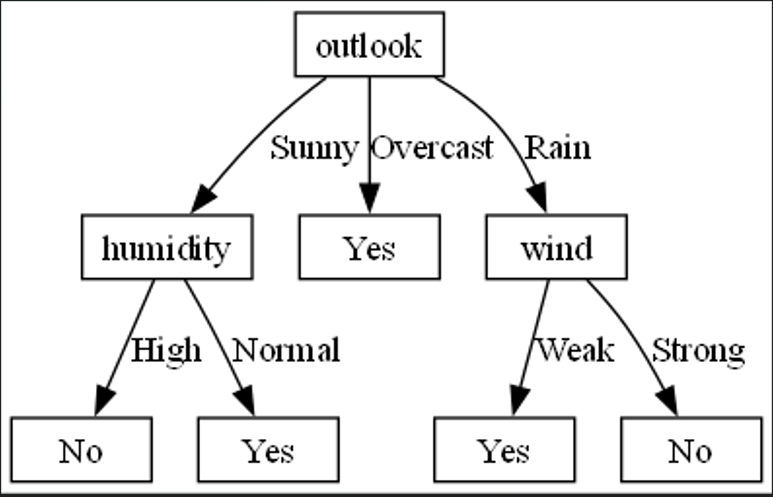
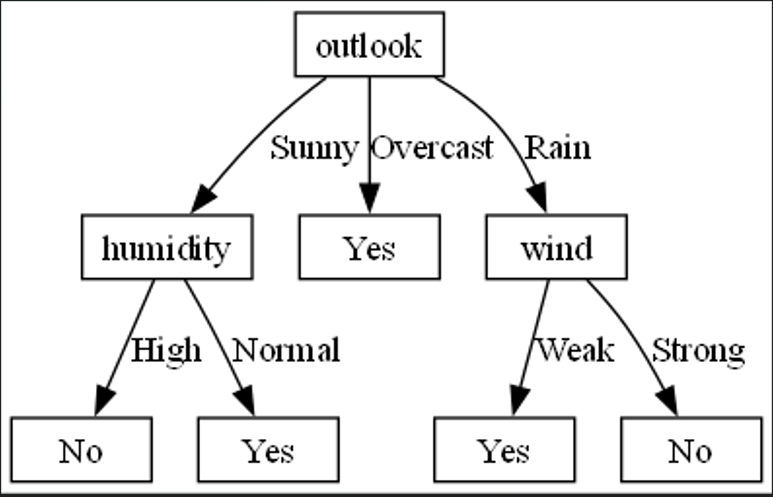
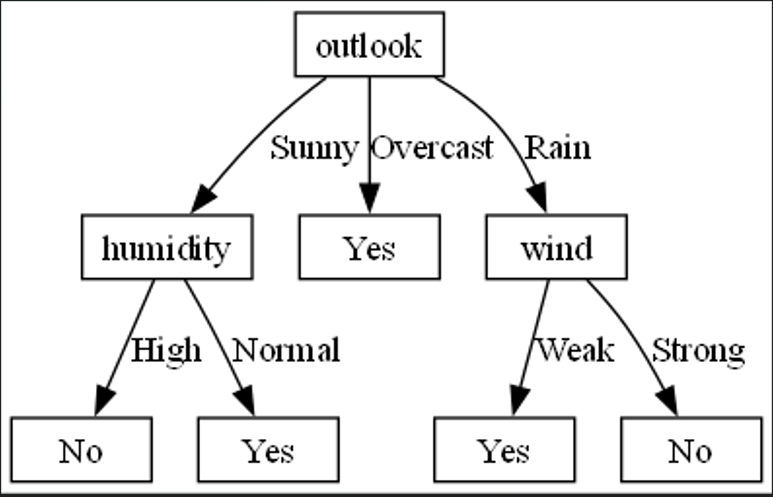

 ![image.png](attachment:2f9c7fad-2f4a-4495-92a3-862ee8081d5a.png)

## **🔸 Part 2: Decision Tree (sklearn): Regression**

In [19]:
from sklearn import tree

### Regression

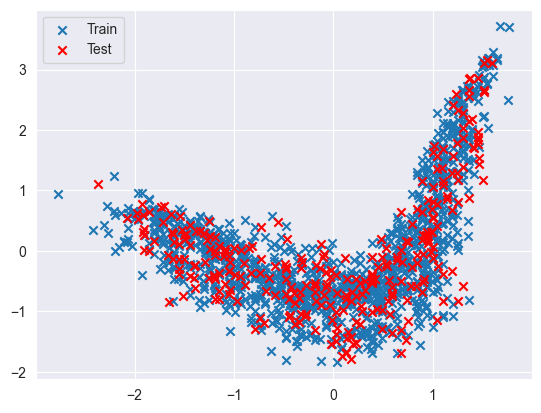

In [20]:
df = pd.read_csv("Lab2-Data/energy-train-l.csv")   #(14) read csv train energy dataset with pandas
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv("Lab2-Data/energy-test-l.csv")          #(15) read csv test energy dataset with pandas
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.legend(['Train', 'Test'])

<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'> change the depth of the tree (1,2,3,4) and compare the data points and the trees

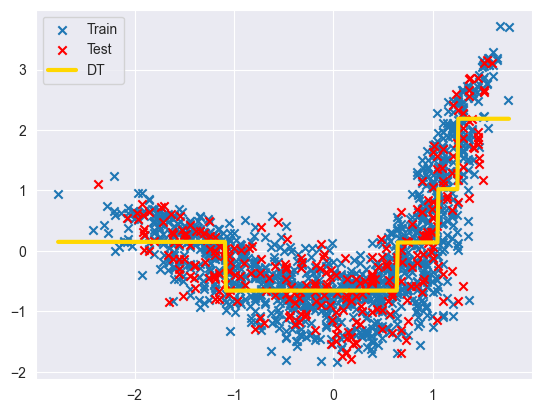

In [49]:
depth = 3 #(16) different depths
reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=0.05)
reg.fit(x_train, y_train)

# Generate data points for plotting
xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp = reg.predict(xp)

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')
plt.plot(xp, yp, color='gold', linewidth=3)

plt.legend(['Train', 'Test', 'DT'])

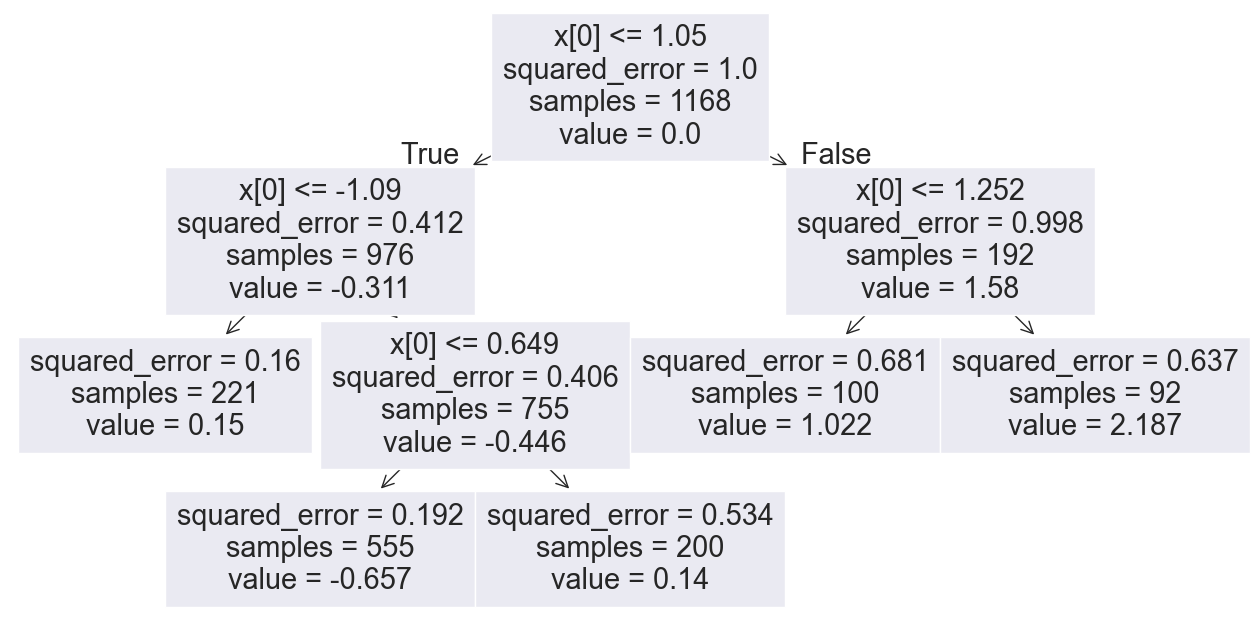

In [50]:
plt.figure(figsize=(16, 8))
tree.plot_tree(reg);

In [51]:
reg.score(x_train, y_train), reg.score(x_test, y_test)

(0.6786002767516198, 0.6102814513496133)

<font color='#GG15D'>**Question3:**</font> <font color='#EE15D'>
Answer:

The following values are the computed scores of the train and test sets for different depths of the decision tree, as we can observe the score difference from depth 1 up to 3 increases but from depth 3 to 4 it stays the same, signaling that 3 is the optimal depth for this model.

depth 1 - score train: 0.4912; score test: 0.4787

depth 2 - score train: 0.5988; score test: 0.5383

depth 3 - score train: 0.6786; score test: 0.6103

depth 4 - score train: 0.6786; score test: 0.6103